In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df. isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

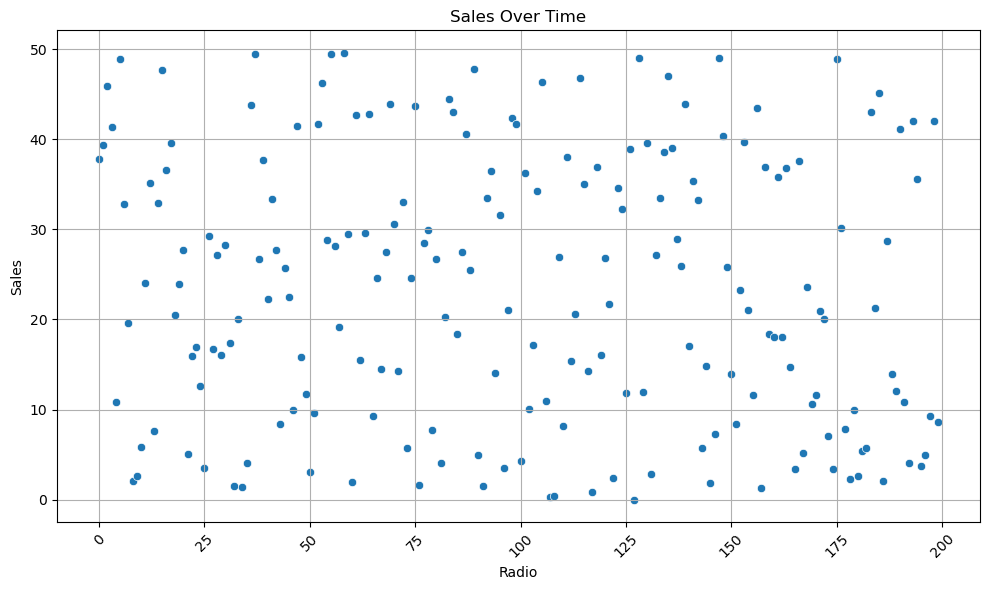

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sales_data = pd.read_csv('advertising.csv')
plt.figure(figsize=(10, 6))
sns.scatterplot(sales_data['Radio'],  marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


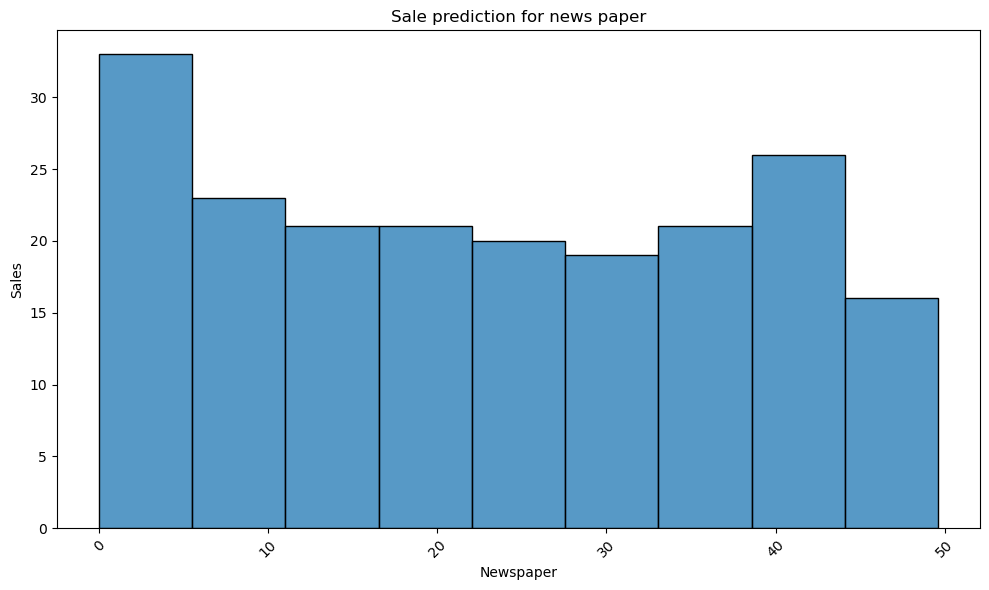

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Radio'],linestyle='-')
plt.title('Sale prediction for news paper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


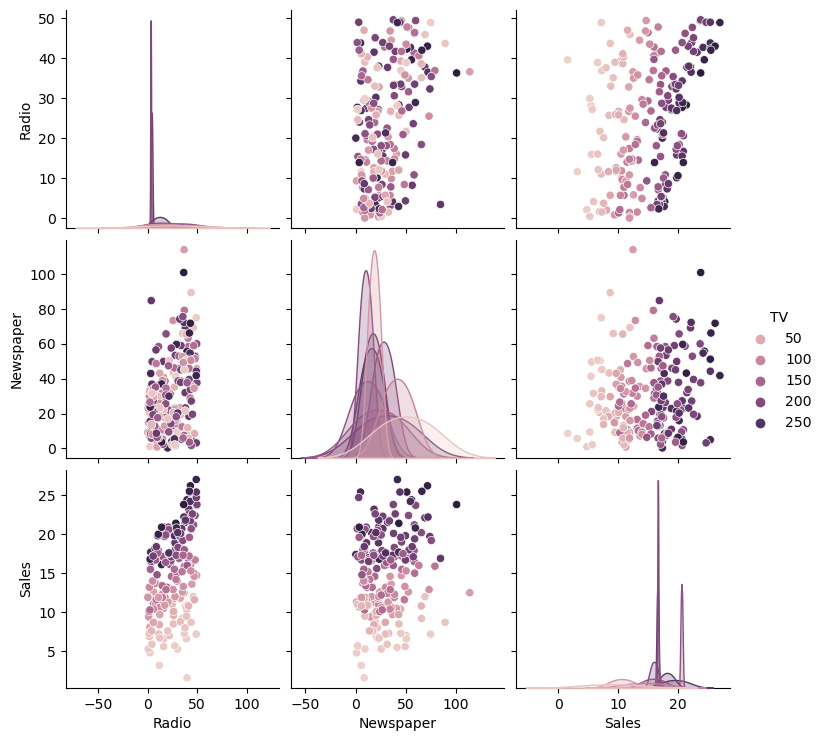

In [25]:
sns.pairplot(df,hue='TV',height=2.5)
plt.show()

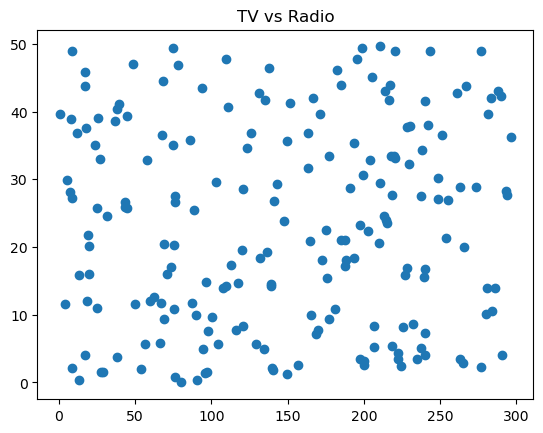

In [28]:
plt.scatter(df['TV'],df['Radio'])
plt.title("TV vs Radio")
plt.show()

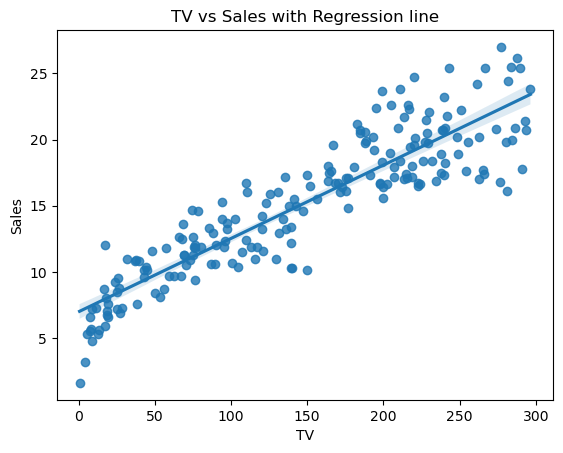

In [33]:
sns.regplot(x='TV',y='Sales',data=df)
plt.title("TV vs Sales with Regression line")
plt.show()

<Figure size 800x600 with 0 Axes>

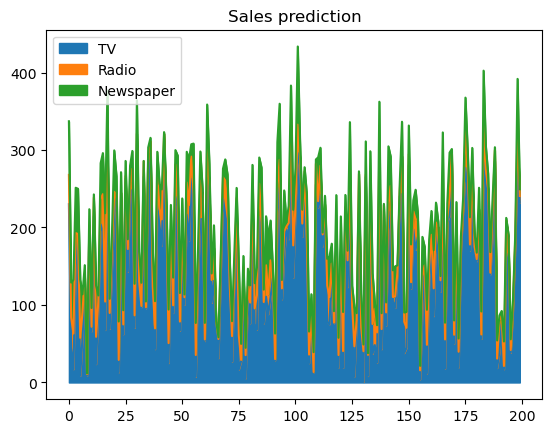

In [37]:
plt.figure(figsize=(8,6))
df[['TV','Radio','Newspaper']].plot(kind='area')
plt.title("Sales prediction")
plt.show()

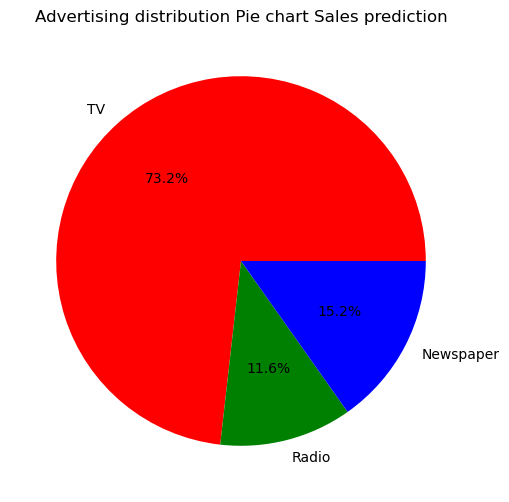

In [47]:
plt.figure(figsize=(8,6))
df[['TV','Radio','Newspaper']].sum().plot(kind='pie',autopct='%1.1f%%',colors=['red','green','blue'])
plt.title("Advertising distribution Pie chart Sales prediction")
plt.show()

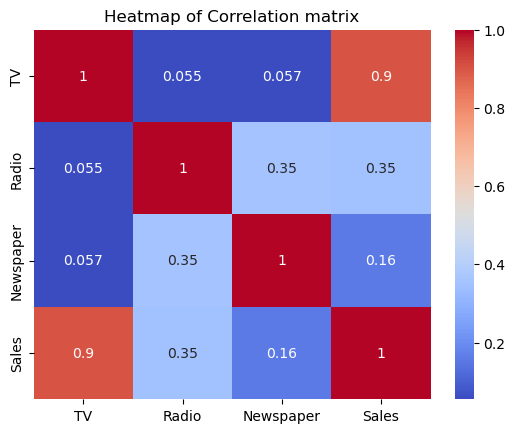

In [51]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation matrix")
plt.show()

In [52]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

In [69]:
model=LinearRegression()
model.fit(x_train_scaler,y_train)

LinearRegression()

In [70]:
y_pred=model.predict(x_test_scaler)


In [74]:
msc=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean square error:",msc)
print("R squared:",r2)

Mean square error: 3.8167354569435203
R squared: 0.8764854501314348


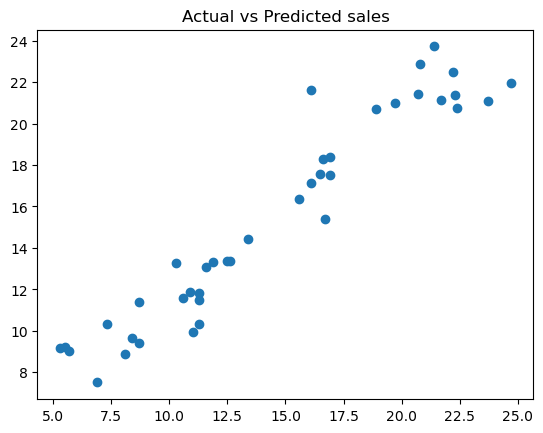

In [76]:
plt.scatter(y_test,y_pred)
plt.title("Actual vs Predicted sales")
plt.show()

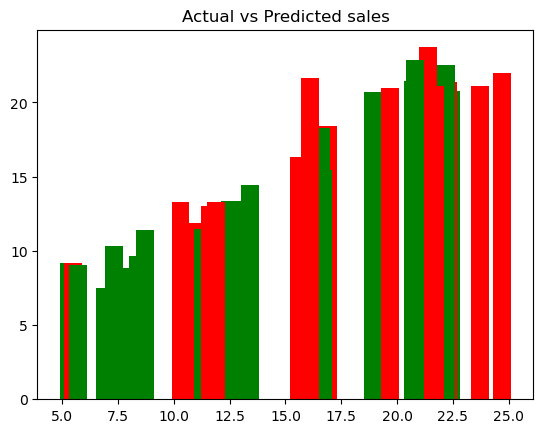

In [78]:
plt.bar(y_test,y_pred,color=['red','green'])
plt.title("Actual vs Predicted sales")
plt.show()